## 正規分布
#### 68-95-99.7ルール

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats

from sklearn.preprocessing import StandardScaler

In [2]:
df = sns.load_dataset('tips')
df['tip_rate'] = df['tip'] / df['total_bill']
df.head()

,total_bill,tip,sex,smoker,day,time,size,tip_rate
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808


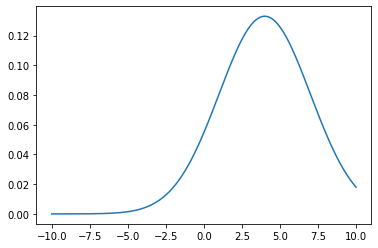

In [3]:
x = np.linspace(-10, 10, 1000)
y = stats.norm(loc=4, scale=3).pdf(x)
plt.plot(x, y)

In [4]:
# 68-95-99.7
group1 = list()
group2 = list()
group3 = list()
samples = list()
for i in range(1000):
    sample = stats.norm(loc=4, scale=3).rvs()
    if 4-3 < sample < 4+3:
        group1.append(sample)
    elif 4-6 < sample < 4+6:
        group2.append(sample)
    elif 4-9 < sample < 4+9:
        group3.append(sample)
    samples.append(sample)

In [5]:
len(samples)

1000

In [6]:
print(len(group1)/len(samples))
print(len(group1+group2)/len(samples))
print(len(group1+group2+group3)/len(samples))

0.659
0.959
0.998


## 標準正規分布
### 標準化

In [7]:
scaler = StandardScaler()

In [8]:
scaler.fit_transform([[1, 30], [2, 50], [3, 10], [4, 40]])

array([[-1.34164079, -0.16903085],
       [-0.4472136 ,  1.18321596],
       [ 0.4472136 , -1.52127766],
       [ 1.34164079,  0.50709255]])

In [9]:
df['tip_rate'].values.shape

(244,)

In [10]:
# 一次元なのでreshapeする
scaled1 = scaler.fit_transform(df['tip_rate'].values.reshape(-1, 1))

In [11]:
# 二次元ならreshapeがいらない
scaled2 = scaler.fit_transform(df[['total_bill', 'tip_rate']])

In [12]:
t_score = scaled1 * 10 + 50

### 二項分布

In [15]:
n = 3
x = np.arange(n+1)
y = stats.binom(n=3, p=1/6).pmf(x)

In [16]:
x

array([0, 1, 2, 3])

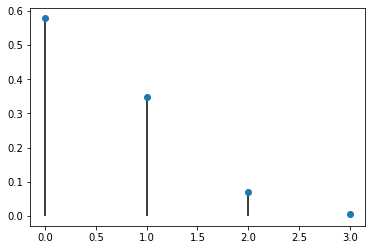

In [19]:
plt.plot(x, y, 'o')
plt.vlines(x, 0, y)

### 二項分布と正規分布

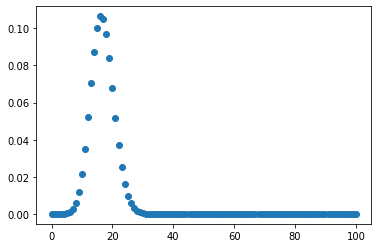

In [23]:
n = 100
p = 1/6
x = np.arange(n+1)
y = stats.binom(n=n, p=p).pmf(x)
plt.plot(x, y, 'o')

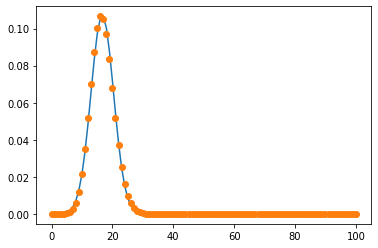

In [30]:
y2 = stats.norm(n*p, np.sqrt(n*p*(1-p))).pdf(x)
plt.plot(x, y2)
plt.plot(x, y, 'o')

In [24]:
stats.binom(n, p).mean()

16.666666666666664

In [25]:
n*p

16.666666666666664

In [26]:
stats.binom(n, p).var()

13.888888888888888

In [28]:
n * p * (1-p)

13.888888888888888